In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import jieba
from tkinter import _flatten
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
data=pd.read_csv('零售商品流水.csv',encoding='gb18030')
data.tail(5)

,单号,门店,日期,货号,品名,规格,单位,交易方式,数量,营业员,收银员
64713,420022302280229,总部,2023-02-28 18:21:49,NaN,无码商品,NaN,NaN,1,1.000,NaN,2002
64714,420022302280229,总部,2023-02-28 18:21:49,254.0,小米椒,NaN,Kg,1,0.968,NaN,2002
64715,420022302280229,总部,2023-02-28 18:21:49,127.0,干蜜枣,NaN,Kg,1,1.136,NaN,2002
64716,420022302280229,总部,2023-02-28 18:21:49,36.0,豆腐,NaN,Kg,1,0.602,NaN,2002
64717,420022302280230,总部,2023-02-28 18:28:47,NaN,无码商品,NaN,NaN,1,1.000,NaN,2002


In [18]:
data_useable=data.drop(['门店','货号','规格','单位','交易方式','数量','营业员','收银员'],axis=1)
data_useable.tail(5)

,单号,日期,品名
64713,420022302280229,2023-02-28 18:21:49,无码商品
64714,420022302280229,2023-02-28 18:21:49,小米椒
64715,420022302280229,2023-02-28 18:21:49,干蜜枣
64716,420022302280229,2023-02-28 18:21:49,豆腐
64717,420022302280230,2023-02-28 18:28:47,无码商品


In [19]:
data_useable=data_useable.drop(data_useable[data_useable['品名']=='无码商品'].index)
data_useable.reset_index(inplace=True)
data_useable=data_useable.drop('index',axis=1)
data_useable.tail(5)

,单号,日期,品名
58929,420022302280228,2023-02-28 18:21:14,豆腐
58930,420022302280228,2023-02-28 18:21:14,金沙河清汤麦芯挂面500g
58931,420022302280229,2023-02-28 18:21:49,小米椒
58932,420022302280229,2023-02-28 18:21:49,干蜜枣
58933,420022302280229,2023-02-28 18:21:49,豆腐


总数: 3800
86
4
4
销量为1的数量: 776
销量为6以下的数量: 2372


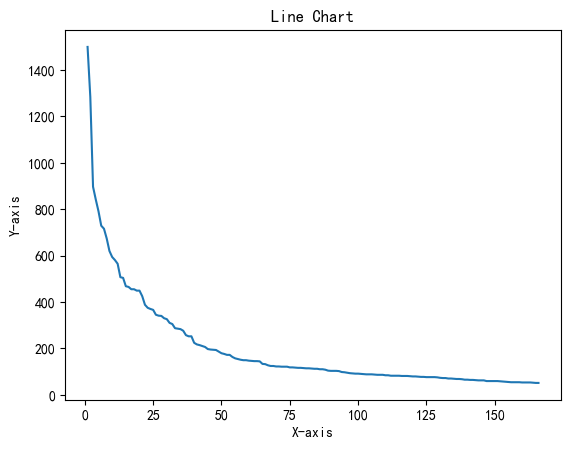

In [221]:
num=data_useable["品名"].value_counts()
print('总数:',len(num))
list_1=[]
list_50=[]
flak=1
for i in range(len(num)):
    if num.values[i]==1:
        list_1.append(1)
    if num.values[i]<=6:
        list_50.append(1)
    if i==1899 or i==1900:
        print(num.values[i])
    if num.values[i]<111 and flak:
        print(i+1)
        flak=0
print('销量为1的数量:',len(list_1))
print('销量为6以下的数量:',len(list_50))

import matplotlib.pyplot as plt

# 假设我们有以下数据
x = list(range(1, 167))
y = num.values[:166]

# 绘制折线图
plt.plot(x, y)

# 添加标题和坐标轴标签
plt.title("Line Chart")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# 显示图形
plt.show()


In [20]:
things=set(data_useable['品名'])
len(things)

3800

In [21]:
data1=data_useable
data1=data1[data1['单号'].astype(str).str.startswith('4')]
#print(data1)
data1['单号']=pd.to_numeric(data1['单号'])
data1=data1.sort_values(by='单号')
data1.reset_index(inplace=True)
data1=data1.drop('index',axis=1)
print(data1)
data_id=set(data1['单号'])
data_id=list(data_id)
data_id.sort()
#data_id


                    单号                   日期                     品名
0      420022301010001  2023-01-01 07:24:55  “妙可蓝多”高钙奶酪棒-90克-缤纷水果味
1      420022301010002  2023-01-01 07:52:56              双汇240G王中王
2      420022301010002  2023-01-01 07:52:56                 康师傅超爽桶
3      420022301010003  2023-01-01 08:05:50            190G黑人茶倍健牙膏
4      420022301010003  2023-01-01 08:05:50             一刷优品儿童9518
...                ...                  ...                    ...
52194  420022302280228  2023-02-28 18:21:14                     豆腐
52195  420022302280228  2023-02-28 18:21:14          金沙河清汤麦芯挂面500g
52196  420022302280229  2023-02-28 18:21:49                    干蜜枣
52197  420022302280229  2023-02-28 18:21:49                    小米椒
52198  420022302280229  2023-02-28 18:21:49                     豆腐

[52199 rows x 3 columns]


C:\Users\86158\AppData\Local\Temp\ipykernel_2516\2162853463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['单号']=pd.to_numeric(data1['单号'])


In [149]:
import random
import warnings
import math

# 忽略所有类型的警告
warnings.filterwarnings('ignore')

fancha=0
min_support_sum=0
random_data=[]
xyz=[]
for i in range(1):
    a=pd.DataFrame(columns=['单号','日期','品名'])
    for j in range(1000):
        x=random.randint(0,52198)
        a.loc[j]=data1.loc[x]
    s=a['品名'].value_counts()
    y=random.randint(0,len(s)-1)
    random_data.append(s.index[y])
    s=pd.DataFrame(s,columns=['品名','频率'])
    for i in range(len(s['品名'])):
        s['频率'][i]=s['品名'][i]/1000
        
    min_support_sum=min_support_sum+s['频率'].mean()
min_support=min_support_sum/50
for i in range(len(s['品名'])):
    fancha=fancha+(s['频率'][i]-min_support)*(s['频率'][i]-min_support)
fancha=math.sqrt(fancha/50)
print(min_support)
#print(xyz)
#random_data
min_support= min_support + fancha * 1.28
#print("80%分位点：", min_support)

3.795066413662242e-05


In [151]:
s['品名']

豆芽               22
馒头               22
湿面条              21
豆腐               20
凉粉               13
                 ..
旺仔牛奶糖5003G        1
益达木糖醇无糖 蓝莓        1
起亮元气脆骨肠原味         1
蒜苗                1
双汇笋丁牛肉拌饭 154g     1
Name: 品名, Length: 527, dtype: int64

In [223]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = s['品名'].values

a=0
for i in range(50,501,50):
    dat=data[a:i]
   
    mean = np.mean(dat)
    variance = np.var(dat)
    std_dev = np.std(dat)
    print("平均值：", mean)
    print("方差：", variance)
    print("标准差：", std_dev)

平均值： 7.58
方差： 22.363599999999998
标准差： 4.72901681113527
平均值： 5.18
方差： 17.047600000000003
标准差： 4.128873938497033
平均值： 4.12
方差： 13.612266666666665
标准差： 3.689480541575828
平均值： 3.365
方差： 11.941774999999998
标准差： 3.455687341181201
平均值： 2.892
方差： 10.448336
标准差： 3.2323885905008387
平均值： 2.5766666666666667
方差： 9.204122222222223
标准差： 3.0338296297291025
平均值： 2.3514285714285714
方差： 8.19364081632653
标准差： 2.8624536356640835
平均值： 2.1825
方差： 7.369193749999998
标准差： 2.714625895035999
平均值： 2.051111111111111
方差： 6.688498765432099
标准差： 2.586213209585029
平均值： 1.946
方差： 6.119084
标准差： 2.47367823291551


In [22]:
print(data1.head())
data3=data1
data3=data3.drop(labels=0)

data3.reset_index(inplace=True)
data3=data3.drop('index',axis=1)
print(data3.head())

                单号                   日期                     品名
0  420022301010001  2023-01-01 07:24:55  “妙可蓝多”高钙奶酪棒-90克-缤纷水果味
1  420022301010002  2023-01-01 07:52:56              双汇240G王中王
2  420022301010002  2023-01-01 07:52:56                 康师傅超爽桶
3  420022301010003  2023-01-01 08:05:50            190G黑人茶倍健牙膏
4  420022301010003  2023-01-01 08:05:50             一刷优品儿童9518
                单号                   日期           品名
0  420022301010002  2023-01-01 07:52:56    双汇240G王中王
1  420022301010002  2023-01-01 07:52:56       康师傅超爽桶
2  420022301010003  2023-01-01 08:05:50  190G黑人茶倍健牙膏
3  420022301010003  2023-01-01 08:05:50   一刷优品儿童9518
4  420022301010003  2023-01-01 08:05:50      吻洁212牙刷


In [23]:
item=data1['单号'].value_counts()
print(type(item))
print(type(item.values[1]))
print()
a=list(item.index)
b=list(item.values)
item=pd.DataFrame()
item['id']=a
item['count']=b
for i in range(len(item['id'])):
    temp=[]
   
    for j in range(item['count'][i]):
        pass


<class 'pandas.core.series.Series'>
<class 'numpy.int64'>



In [80]:
import time                                  #遍历法
baskets=[]
t1=time.time()
for i in range(len(data_id)):
    temp=[]
    for j in range(len(data1)):
        if(data_id[i]==data1['单号'][j]):
            temp.append(data1['品名'][j])
            print(temp)
    item=','.join(temp)
    baskets.append(item)
t2=time.time() 
T=t2-t1
print(T)
data_aprior=pd.DataFrame.from_dict({
            'id': data_id,
            'baskets': baskets} , orient='index').T
data_aprior

['“妙可蓝多”高钙奶酪棒-90克-缤纷水果味']
['双汇240G王中王']
['双汇240G王中王', '康师傅超爽桶']
['190G黑人茶倍健牙膏']
['190G黑人茶倍健牙膏', '一刷优品儿童9518']
['190G黑人茶倍健牙膏', '一刷优品儿童9518', '吻洁212牙刷']
['190G黑人茶倍健牙膏', '一刷优品儿童9518', '吻洁212牙刷', '全能皂粉']
['米约儿童牙刷920']
['米约儿童牙刷920', '一刷优品儿童9518']
['米约儿童牙刷920', '一刷优品儿童9518', '口益清苹果蜂胶儿童牙膏70g']
['后腿肉']
['香卤猪嘴']
['香卤猪嘴', '高杰酱凤爪']
['香卤猪嘴', '高杰酱凤爪', '后腿肉']
['香卤猪嘴', '高杰酱凤爪', '后腿肉', '馒头']
['香卤猪嘴', '高杰酱凤爪', '后腿肉', '馒头', '馒头']
['菊花心白菜']
['红塔山(经典100)']
['绿豆芽']
['绿豆芽', '春卷']
['绿豆芽', '春卷', '湿面条']
['绿豆芽', '春卷', '湿面条', '湿面条']
['大蒜']
['大蒜', '新土豆']
['大蒜', '新土豆', '豆腐']
['大蒜', '新土豆', '豆腐', '绿豆芽']
['馒头']
['馒头', '后腿肉']
['排骨']
['馒头']
['馒头', '豆皮']
['馒头', '豆皮', '菠菜']
['馒头', '豆皮', '菠菜', '散称鸡头']
['馒头', '豆皮', '菠菜', '散称鸡头', '海带丝，片']
['豆杂面条']
['豆杂面条', '小葱']
['豆杂面条', '小葱', '馒头']
['豆杂面条', '小葱', '馒头', '西葫芦']
['豆腐']
['豆腐', '红欣欣鲜肉大葱饺']
['豆腐', '红欣欣鲜肉大葱饺', '中盐精制']
['凉粉']
['凉粉', '柠檬去油洗洁精']
['西葫芦']
['西葫芦', '新土豆']
['西葫芦', '新土豆', '后腿肉']
['西葫芦', '新土豆', '后腿肉', '排骨']
['三黄鸡']
['三黄鸡', '白象红烧牛肉面']
['三黄鸡', '白象红烧牛肉面', '后腿肉']
['三黄鸡', '白象红烧

['蟹柳']
['蟹柳', '挑吃兔土豆片']
['蟹柳', '挑吃兔土豆片', '鱼豆腐']
['蟹柳', '挑吃兔土豆片', '鱼豆腐', '20g啃发烤鸡翅根奥尔良味']
['蟹柳', '挑吃兔土豆片', '鱼豆腐', '20g啃发烤鸡翅根奥尔良味', '鸡爪筋']
['蟹柳', '挑吃兔土豆片', '鱼豆腐', '20g啃发烤鸡翅根奥尔良味', '鸡爪筋', '鸡爪筋']
['蟹柳', '挑吃兔土豆片', '鱼豆腐', '20g啃发烤鸡翅根奥尔良味', '鸡爪筋', '鸡爪筋', '杨记泡椒鸡爪35g']
['蟹柳', '挑吃兔土豆片', '鱼豆腐', '20g啃发烤鸡翅根奥尔良味', '鸡爪筋', '鸡爪筋', '杨记泡椒鸡爪35g', '起亮食品一根脆骨肠']
['蟹柳', '挑吃兔土豆片', '鱼豆腐', '20g啃发烤鸡翅根奥尔良味', '鸡爪筋', '鸡爪筋', '杨记泡椒鸡爪35g', '起亮食品一根脆骨肠', '比巴卜棉花糖']
['棉花糖']
['棉花糖', '菠萝蜜']
['棉花糖', '菠萝蜜', '红提子']
['棉花糖', '菠萝蜜', '红提子', '后腿肉']
['棉花糖', '菠萝蜜', '红提子', '后腿肉', '湿面条']
['泡椒花生']
['泡椒花生', '叶记老太太花生米180g']
['龙眼桂圆']
['龙眼桂圆']
['豆皮']
['豆皮', '大山刀果子']
['豆皮']
['豆皮', '黄瓜']
['迎客松特制食用盐']
['迎客松特制食用盐', '白糖']
['冻鸡爪']
['冻鸡爪', '绿豆芽']
['冻鸡爪', '绿豆芽', '豆皮']
['冻鸡爪', '绿豆芽', '豆皮', '水晶猪皮']
['冻鸡爪', '绿豆芽', '豆皮', '水晶猪皮', '后腿肉']
['冻鸡爪', '绿豆芽', '豆皮', '水晶猪皮', '后腿肉', '平菇']
['冻鸡爪', '绿豆芽', '豆皮', '水晶猪皮', '后腿肉', '平菇', '山药']
['砂糖橘']
['砂糖橘', '豆角']
['砂糖橘', '豆角', '大油麦菜']
['芹菜']
['芹菜', '香蕉']
['芹菜', '香蕉', '甜心苹果']
['芹菜', '香蕉', '甜心苹果', '砂糖橘']
['西瓜8424']
['沃柑橙']


['豆皮']
['豆皮', '砂糖橘']
['豆皮', '砂糖橘', 'LT']
['豆皮', '砂糖橘', 'LT', '小蜜薯']
['散称爆米花']
['散称爆米花', '假水']
['散称爆米花', '假水', '晶晶起泡胶']
['百事可乐']
['百事可乐', '500ML雪碧零卡']
['白莲藕']
['白莲藕', '番茄']
['白莲藕', '番茄', '麻花面筋']
['白莲藕', '番茄', '麻花面筋', '豆皮']
['白莲藕', '番茄', '麻花面筋', '豆皮', '鲜红辣椒']
['白莲藕', '番茄', '麻花面筋', '豆皮', '鲜红辣椒', '海带丝，片']
['白莲藕', '番茄', '麻花面筋', '豆皮', '鲜红辣椒', '海带丝，片', '小葱']
['白莲藕', '番茄', '麻花面筋', '豆皮', '鲜红辣椒', '海带丝，片', '小葱', '绿豆芽']
['白莲藕', '番茄', '麻花面筋', '豆皮', '鲜红辣椒', '海带丝，片', '小葱', '绿豆芽', '芹菜']
['白莲藕', '番茄', '麻花面筋', '豆皮', '鲜红辣椒', '海带丝，片', '小葱', '绿豆芽', '芹菜', '馒头']
['络馍']
['络馍', '甜心苹果']
['络馍', '甜心苹果', '香梨']
['8散称饼干']
['大油麦菜']
['大油麦菜', '湿面条']
['A68908七度空间/8片/福建恒安6808']
['A68908七度空间/8片/福建恒安6808', '800g笨笨狗夹心米果']
['旺仔复原乳牛奶']
['旺仔复原乳牛奶', '李子园牛奶原味']
['香蕉']
['香蕉', '凉粉']
['香蕉', '凉粉', '黄瓜']
['香蕉', '凉粉', '黄瓜', '统一冰红茶1L']
['平菇']
['平菇', '花菜']
['平菇', '花菜', '络馍']
['平菇', '花菜', '络馍', '新土豆']
['平菇', '花菜', '络馍', '新土豆', '生菜']
['平菇', '花菜', '络馍', '新土豆', '生菜', '小青菜']
['平菇', '花菜', '络馍', '新土豆', '生菜', '小青菜', '湿面条']
['平菇', '花菜', '络馍', '新

['香梨']
['香梨', '旺仔1*4']
['香梨', '旺仔1*4', '柠檬']
['香梨', '旺仔1*4', '柠檬', '老冰糖']
['香梨', '旺仔1*4', '柠檬', '老冰糖', '菠萝蜜']
['香梨', '旺仔1*4', '柠檬', '老冰糖', '菠萝蜜', '砂糖橘']
['海带丝，片']
['海带丝，片', '思念400g黑芝麻']
['有机黄小米']
['24组超值特惠装']
['0487消亮袋装牙签']
['0487消亮袋装牙签', '清亮保暖手套1392']
['0487消亮袋装牙签', '清亮保暖手套1392', '豆芽']
['阳光玫瑰葡萄']
['阳光玫瑰葡萄', '西葫芦']
['阳光玫瑰葡萄', '西葫芦', '沣瑞黑椒味牛排']
['阳光玫瑰葡萄', '西葫芦', '沣瑞黑椒味牛排', '羊肉卷']
['阳光玫瑰葡萄', '西葫芦', '沣瑞黑椒味牛排', '羊肉卷', '舒莱18片组合']
['阳光玫瑰葡萄', '西葫芦', '沣瑞黑椒味牛排', '羊肉卷', '舒莱18片组合', '沣瑞牛排番茄味']
['七度少女纯棉超薄日用卫生巾']
['七度少女纯棉超薄日用卫生巾', '水晶花 棉柔优享 360']
['七度少女纯棉超薄日用卫生巾', '水晶花 棉柔优享 360', '33g好丽友好多鱼（番茄）']
['七度少女纯棉超薄日用卫生巾', '水晶花 棉柔优享 360', '33g好丽友好多鱼（番茄）', '上好佳蟹味逸族']
['络馍']
['络馍', '络馍']
['络馍', '络馍', '新土豆']
['蘑菇力草莓味']
['嘉士利93克夹心饼蓝莓味']
['嘉士利93克夹心饼蓝莓味', '嘉士利93克果乐草莓夹心饼干']
['龙眼桂圆']
['龙眼桂圆', '白柚子']
['龙眼桂圆', '白柚子', '沃柑橙']
['雀巢牛奶威化20g']
['排骨']
['李子园牛奶原味']
['李子园牛奶原味', '阳光']
['双汇旺厨料理香肠760g']
['双汇旺厨料理香肠760g', '干蜜枣']
['双汇旺厨料理香肠760g', '干蜜枣', '生姜']
['双汇旺厨料理香肠760g', '干蜜枣', '生姜', '新土豆']
['双汇旺厨料理香肠760g', '干蜜枣', '生姜', '新土豆', '

['砂糖橘']
['8散称饼干']
['8散称饼干', '金果棒']
['LT']
['8散称饼干']
['8散称饼干', '卫龙小面筋']
['8散称饼干', '卫龙小面筋', '香梨']
['8散称饼干', '卫龙小面筋', '香梨', '散称爆米花']
['脆皮香干']
['脆皮香干', '迷你香辣条']
['脆皮香干', '迷你香辣条', '梁福吉吐司面包']
['榴莲']
['山药']
['山药', '黄苹果']
['香之派柠檬酸辣鸡爪筋']
['香之派柠檬酸辣鸡爪筋', '海带片香辣味']
['香之派柠檬酸辣鸡爪筋', '海带片香辣味', '大耳鱿鱼香辣味']
['香之派柠檬酸辣鸡爪筋', '海带片香辣味', '大耳鱿鱼香辣味', '阿尔卑斯焦香源味牛奶硬糖']
['香之派柠檬酸辣鸡爪筋', '海带片香辣味', '大耳鱿鱼香辣味', '阿尔卑斯焦香源味牛奶硬糖', '藕片']
['香之派柠檬酸辣鸡爪筋', '海带片香辣味', '大耳鱿鱼香辣味', '阿尔卑斯焦香源味牛奶硬糖', '藕片', '鱼豆腐好味屋']
['香之派柠檬酸辣鸡爪筋', '海带片香辣味', '大耳鱿鱼香辣味', '阿尔卑斯焦香源味牛奶硬糖', '藕片', '鱼豆腐好味屋', '尖叫烤脖香辣味']
['香之派柠檬酸辣鸡爪筋', '海带片香辣味', '大耳鱿鱼香辣味', '阿尔卑斯焦香源味牛奶硬糖', '藕片', '鱼豆腐好味屋', '尖叫烤脖香辣味', '220g加减乘除韩话梅']
['香之派柠檬酸辣鸡爪筋', '海带片香辣味', '大耳鱿鱼香辣味', '阿尔卑斯焦香源味牛奶硬糖', '藕片', '鱼豆腐好味屋', '尖叫烤脖香辣味', '220g加减乘除韩话梅', '大刀鱿鱼']
['香之派柠檬酸辣鸡爪筋', '海带片香辣味', '大耳鱿鱼香辣味', '阿尔卑斯焦香源味牛奶硬糖', '藕片', '鱼豆腐好味屋', '尖叫烤脖香辣味', '220g加减乘除韩话梅', '大刀鱿鱼', '60克烧人梅']
['香之派柠檬酸辣鸡爪筋', '海带片香辣味', '大耳鱿鱼香辣味', '阿尔卑斯焦香源味牛奶硬糖', '藕片', '鱼豆腐好味屋', '尖叫烤脖香辣味', '220g加减乘除韩话梅', '大刀鱿鱼', '60克烧人梅', '鸭脖']
['香之派柠檬酸辣鸡爪筋', '海带片香辣味', '大

['好食郡花生辣椒蚕豆']
['帝花倍效护发素去屑柔顺型']
['帝花倍效护发素去屑柔顺型', '绿效洗发水']
['络馍']
['络馍', '蒜黄']
['络馍', '蒜黄', '凉粉']
['络馍', '蒜黄', '凉粉', '冻鸡爪']
['150G大红袍珍品火锅底料']
['150G大红袍珍品火锅底料', '白莲藕']
['150G大红袍珍品火锅底料', '白莲藕', '金针菇']
['150G大红袍珍品火锅底料', '白莲藕', '金针菇', '三全肉丸']
['猪血']
['猪血', '豆腐']
['猪血', '豆腐', '奥利奥散称']
['猪血', '豆腐', '奥利奥散称', '春卷']
['猪血', '豆腐', '奥利奥散称', '春卷', '蒜黄']
['猪血', '豆腐', '奥利奥散称', '春卷', '蒜黄', '散称鸡头']
['猪血', '豆腐', '奥利奥散称', '春卷', '蒜黄', '散称鸡头', '双汇金品配餐王500g']
['猪血', '豆腐', '奥利奥散称', '春卷', '蒜黄', '散称鸡头', '双汇金品配餐王500g', '双汇美味盐水香肠买一送一']
['猪血', '豆腐', '奥利奥散称', '春卷', '蒜黄', '散称鸡头', '双汇金品配餐王500g', '双汇美味盐水香肠买一送一', '8散称饼干']
['螺丝椒']
['螺丝椒', '新土豆']
['螺丝椒', '新土豆', '红萝卜']
['螺丝椒', '新土豆', '红萝卜', '生菜']
['螺丝椒', '新土豆', '红萝卜', '生菜', '豆角']
['平菇']
['平菇', '蒜苗']
['平菇', '蒜苗', '芹菜']
['平菇', '蒜苗', '芹菜', '馒头']
['大蒜']
['湿面条']
['湿面条', '好食郡花生辣椒蚕豆']
['凉粉']
['凉粉', '猫王纸']
['散称香瓜子']
['散称香瓜子', '小蜜薯']
['散称香瓜子', '小蜜薯', '芹菜']
['生姜']
['生姜', '新土豆']
['生姜', '新土豆', '大蒜']
['金沙河1KG劲薄银丝面']
['小蜜薯']
['小蜜薯', '红薯']
['散称香瓜子']
['番茄']
['番茄', '湿面条']
['番茄']
['番茄', '干扣

['金锣香甜王']
['砂糖橘']
['砂糖橘', '馒头']
['豆腐']
['豆腐', '白莲藕']
['新土豆']
['新土豆', '怡冠园 蒜蓉豆条']
['新土豆', '怡冠园 蒜蓉豆条', '永花胡辣汤']
['新土豆', '怡冠园 蒜蓉豆条', '永花胡辣汤', '旺旺仙贝555g']
['白莲藕']
['白莲藕', '豆腐']
['天喔茶庄蜂蜜柚子茶']
['白柚子']
['白柚子', '砂糖橘']
['白柚子', '砂糖橘', '三牛饼干蛋糕']
['怪跳跳跳糖']
['散称爆米花']
['猕猴桃']
['猕猴桃', '散称香瓜子']
['大油麦菜']
['大油麦菜', '砂糖橘']
['散称香瓜子']
['鳕鱼棒芝士味']
['鳕鱼棒芝士味', '西瓜子']
['怡冠园火爆辣丝']
['怡冠园火爆辣丝', '火爆辣丝']
['巧巧虾条原味']
['巧巧虾条原味', '红心火龙果']
['巧巧虾条原味', '红心火龙果', '生菜']
['巧巧虾条原味', '红心火龙果', '生菜', '19.8泡吧散称']
['巧巧虾条原味', '红心火龙果', '生菜', '19.8泡吧散称', '小鱼小虾']
['榴莲']
['黄瓜']
['黄瓜', '卫龙湘西辣面']
['洋葱']
['洋葱', '知宴无沙紫菜']
['香菜']
['香菜', '洋葱']
['韭菜']
['韭菜', '生姜']
['陶华碧老干妈风味鸡油辣椒280G']
['60克烧人梅']
['洁丽雅京京毛巾7503']
['洁丽雅京京毛巾7503', '猫王抽纸1*6包']
['洁丽雅京京毛巾7503', '猫王抽纸1*6包', '香辣烩面']
['洁丽雅京京毛巾7503', '猫王抽纸1*6包', '香辣烩面', '顶大酸汤面片']
['洁丽雅京京毛巾7503', '猫王抽纸1*6包', '香辣烩面', '顶大酸汤面片', '酸汤面片桶装']
['安井手抓饼']
['安井手抓饼', '肖家香料孜然烧烤料']
['安井手抓饼', '肖家香料孜然烧烤料', '永花胡辣汤']
['发夹贴']
['发夹贴', '水晶泥']
['发夹贴', '水晶泥', '课堂挂钩']
['发夹贴', '水晶泥', '课堂挂钩', '七彩虫橡皮糖90克']
['发夹贴', '水晶泥', '课堂挂钩', '七彩虫

['麻花面筋']
['麻花面筋', '湿面条']
['麻花面筋', '湿面条', '散称鸡头']
['麻花面筋', '湿面条', '散称鸡头', '后腿肉']
['麻花面筋', '湿面条', '散称鸡头', '后腿肉', '散称鸡头']
['麻花面筋', '湿面条', '散称鸡头', '后腿肉', '散称鸡头', '新土豆']
['麻花面筋', '湿面条', '散称鸡头', '后腿肉', '散称鸡头', '新土豆', '生姜']
['后腿肉']
['后腿肉']
['后腿肉', '香菜']
['后腿肉', '香菜', '西葫芦']
['后腿肉', '香菜', '西葫芦', '蒜苗']
['鸭蛋']
['鸭蛋', '西葫芦']
['花菜']
['花菜', '海带丝，片']
['花菜', '海带丝，片', '新土豆']
['花菜', '海带丝，片', '新土豆', '水晶猪皮']
['豆腐']
['豆腐', '豆芽']
['红薯']
['馒头']
['馒头', '馒头']
['永花胡辣汤']
['后腿肉']
['后腿肉', '新土豆']
['后腿肉', '新土豆', '平菇']
['后腿肉', '新土豆', '平菇', '芹菜']
['香叶恋猪蹄']
['香叶恋猪蹄', '大米']
['后腿肉']
['后腿肉', '馒头']
['散称鸡头']
['m']
['客帝名人']
['客帝名人', '雪莱雅']
['客帝名人', '雪莱雅', '雅歌丽白牙刷']
['绿豆芽']
['绿豆芽', '平菇']
['绿豆芽', '平菇', '榴莲']
['后腿肉']
['后腿肉', '排骨']
['后腿肉', '排骨', '八角']
['八角']
['八角', '排骨']
['八角', '排骨', '白萝卜']
['知心话魔发绳糖']
['知心话魔发绳糖', '美添乐']
['九珍葱姜料酒1.75L']
['九珍葱姜料酒1.75L', '海天草菇老抽500ml']
['起亮食品一根脆骨肠']
['起亮食品一根脆骨肠', '好味屋热狗肠']
['55g卡夫奥利奥巧脆卷']
['55g卡夫奥利奥巧脆卷', '啃发42g烤脖甜麻辣味']
['皇名中老年高钙核桃粉']
['皇名中老年高钙核桃粉', '卫龙重庆风味']
['皇名中老年高钙核桃粉', '卫龙重庆风味', '火锅素毛肚香辣味']
[

['龙眼桂圆']
['生姜']
['生姜', '加加白醋800ML']
['新土豆']
['新土豆', '豆芽']
['新土豆', '豆芽', '豆腐']
['榴莲']
['小蜜薯']
['豆芽']
['麻辣豆']
['麻辣豆', '湿面条']
['干扣面']
['干扣面', '韭菜']
['干扣面', '韭菜', '豆腐']
['干扣面', '韭菜', '豆腐', '天喔蜂蜜卡曼橘茶']
['干扣面', '韭菜', '豆腐', '天喔蜂蜜卡曼橘茶', '小茗同学冷泡溜溜哒茶']
['榴莲']
['青薄皮辣椒']
['青薄皮辣椒', '大蒜']
['青薄皮辣椒', '大蒜', '小米椒']
['80g香飘飘三连装香芋']
['80g香飘飘三连装香芋', '艺中香50g鸡爪']
['80g香飘飘三连装香芋', '艺中香50g鸡爪', '旺旺仙贝555g']
['80g香飘飘三连装香芋', '艺中香50g鸡爪', '旺旺仙贝555g', '绿豆芽']
['80g香飘飘三连装香芋', '艺中香50g鸡爪', '旺旺仙贝555g', '绿豆芽', '生菜']
['80g香飘飘三连装香芋', '艺中香50g鸡爪', '旺旺仙贝555g', '绿豆芽', '生菜', '砂糖橘']
['80g香飘飘三连装香芋', '艺中香50g鸡爪', '旺旺仙贝555g', '绿豆芽', '生菜', '砂糖橘', '湿面条']
['豆腐']
['豆腐', '尖椒']
['小米椒']
['小米椒', '排骨']
['小米椒', '排骨', '水晶猪皮']
['小米椒', '排骨', '水晶猪皮', '念多手抓饼']
['小米椒', '排骨', '水晶猪皮', '念多手抓饼', '青薄皮辣椒']
['小米椒', '排骨', '水晶猪皮', '念多手抓饼', '青薄皮辣椒', '生姜']
['小米椒', '排骨', '水晶猪皮', '念多手抓饼', '青薄皮辣椒', '生姜', '豆角']
['小米椒', '排骨', '水晶猪皮', '念多手抓饼', '青薄皮辣椒', '生姜', '豆角', '番茄']
['小米椒', '排骨', '水晶猪皮', '念多手抓饼', '青薄皮辣椒', '生姜', '豆角', '番茄', '芹菜']
['小米椒', '排骨', '水晶猪皮', '念多手抓饼', '青薄皮

['金针菇']
['金针菇', '平菇']
['金针菇', '平菇', '三全肉丸']
['金针菇', '平菇', '三全肉丸', '青薄皮辣椒']
['金针菇', '平菇', '三全肉丸', '青薄皮辣椒', '豆角']
['葡萄干']
['葡萄干', '6伟龙散称饼干']
['旺旺仙贝555g']
['黄瓜']
['黄瓜', '西葫芦']
['鸡爪筋']
['老干妈风味豆豉']
['平菇']
['平菇', '金针菇']
['平菇', '金针菇', '豆角']
['红富士苹果']
['红富士苹果', '红心火龙果']
['植物香薰组合']
['植物香薰组合', '红花生米']
['木依棉面巾纸']
['木依棉面巾纸', '木棉树卫生纸']
['木依棉面巾纸', '木棉树卫生纸', '立白1.12kg金桔洗洁精']
['8散称饼干']
['8散称饼干', '6伟龙散称饼干']
['8散称饼干', '6伟龙散称饼干', '风车棒']
['麻辣豆']
['糖']
['糖', '炫迈口香糖瓶']
['大鸡腿']
['大鸡腿', '馒头']
['大鸡腿', '馒头', '玩味鸡爪原味/泡椒味35g']
['金桔柠檬']
['好丽友408克']
['好丽友408克', '小鱼小虾']
['好丽友408克', '小鱼小虾', '营养卫士火鸡面5连包']
['K']
['西葫芦']
['西葫芦', '汰渍洗洁精买一送一']
['西葫芦', '汰渍洗洁精买一送一', '三全肉丸']
['西葫芦', '汰渍洗洁精买一送一', '三全肉丸', '韭菜']
['西葫芦', '汰渍洗洁精买一送一', '三全肉丸', '韭菜', '金针菇']
['西葫芦', '汰渍洗洁精买一送一', '三全肉丸', '韭菜', '金针菇', '红薯']
['西葫芦', '汰渍洗洁精买一送一', '三全肉丸', '韭菜', '金针菇', '红薯', '番茄']
['西葫芦', '汰渍洗洁精买一送一', '三全肉丸', '韭菜', '金针菇', '红薯', '番茄', '统一红椒牛肉面90g']
['6伟龙散称饼干']
['6伟龙散称饼干', '达利园散称']
['6伟龙散称饼干']
['6伟龙散称饼干', '钙奶饼干']
['新土豆']
['新土豆', '小枣散称']
['新土豆', '小枣散称', '香梨'

['络馍']
['络馍', '嫩芽紫菜']
['络馍', '嫩芽紫菜', '红薯']
['络馍', '嫩芽紫菜', '红薯', '新土豆']
['络馍', '嫩芽紫菜', '红薯', '新土豆', '手工馄饨']
['嘻哈会原味螺狮粉']
['嘻哈会原味螺狮粉', '海底捞酸辣什锦粉']
['嘻哈会原味螺狮粉', '海底捞酸辣什锦粉', '黄焖鸡拌饭']
['250g牛肉粒混合味']
['250g牛肉粒混合味', '邦尔舒超熟睡卫生巾']
['250g牛肉粒混合味', '邦尔舒超熟睡卫生巾', '金币巧克力']
['伊脆薯条15克']
['伊脆薯条15克', '植爱草本滋润防干霜60克']
['伊脆薯条15克', '植爱草本滋润防干霜60克', '雪糕橡皮糖']
['伊脆薯条15克', '植爱草本滋润防干霜60克', '雪糕橡皮糖', '贝时乐铅笔糖9g']
['伊脆薯条15克', '植爱草本滋润防干霜60克', '雪糕橡皮糖', '贝时乐铅笔糖9g', '趣味小熊']
['伊脆薯条15克', '植爱草本滋润防干霜60克', '雪糕橡皮糖', '贝时乐铅笔糖9g', '趣味小熊', '“妙可蓝多”益生元奶酪棒-90克-原味']
['伊脆薯条15克', '植爱草本滋润防干霜60克', '雪糕橡皮糖', '贝时乐铅笔糖9g', '趣味小熊', '“妙可蓝多”益生元奶酪棒-90克-原味', '6伟龙散称饼干']
['三湘古镇酱香羊排味158g']
['三湘古镇酱香羊排味158g', '呼辣超级棒']
['三湘古镇酱香羊排味158g', '呼辣超级棒', '340ml优乐多']
['三湘古镇酱香羊排味158g', '呼辣超级棒', '340ml优乐多', '辣可曦曦火脾气丝118g']
['150G大红袍珍品火锅底料']
['K']
['K', '美添乐']
['K', '美添乐', '伊利干吃鲜奶片(片装)']
['K', '美添乐', '伊利干吃鲜奶片(片装)', '台湾风味米饼']
['K', '美添乐', '伊利干吃鲜奶片(片装)', '台湾风味米饼', '手工糖玩新世界']
['K', '美添乐', '伊利干吃鲜奶片(片装)', '台湾风味米饼', '手工糖玩新世界', '手雷']
['K', '美添乐', '伊利干吃鲜奶片(片装)', '台湾风味米饼', '手工

KeyboardInterrupt: 

In [53]:
import time                                 #折半查找法
data2=data1[0:10000]
baskets=[]
item=data2['单号'].value_counts()
t1=time.time()
for i in range(len(item.index)):
    temp=[]
    for j in range(item.values[i]):
        low=0
        high=len(data2['单号'])-1
        y=0
        while(low<=high):
            mid=(low+high)//2
            if(item.index[i]==data2['单号'][mid]):
                temp.append(data2['品名'][mid])
                y=mid
                break
            elif(item.index[i]>data2['单号'][mid]):
                low=mid+1
            elif(item.index[i]<data2['单号'][mid]):
                high=mid-1
            if(low>high):
                break
        data2=data2.drop(labels=y)
        data2.reset_index(inplace=True)
        data2=data2.drop('index',axis=1)
    tip=','.join(temp)
    baskets.append(tip) 
t2=time.time() 
T=t2-t1
print(T)
data_aprior=pd.DataFrame.from_dict({
            'id': item.index,
            'baskets': baskets} , orient='index').T
data_aprior

24.053749322891235


,id,baskets
0,420022301030127,"后腿肉,迎客松特制食用盐,西葫芦,新土豆,细粉仁,大蒜,加加酱油,散称香瓜子,山药,湿面条,..."
1,420022301090018,"阿斯塔特90g七彩熊橡皮糖,格力高百奇（蓝莓树莓）,鳕鱼棒原味,动物橡皮糖90G,★奥利奥夹..."
2,420022301090325,"乔麦仁,手剥笋,红花生米,思念黑糯黑芝汤圆454g,好食郡花生辣椒蚕豆,干蜜枣,细粉仁,太太..."
3,420022301090009,"米多奇,安慕希黄桃风味牛奶,伊利安慕希希腊酸奶,阿尔卑斯桂花酸奶味软糖,8散称饼干,乐事,百..."
4,420022301090382,"大麦仁,薏仁,花椒壳,红花生米,大蒜,西葫芦,干蜜枣,海天金标蚝油715g,m,恒顺料酒,刷..."
...,...,...
3497,420022301060065,砂糖橘
3498,420022301060060,筷子309
3499,420022301060059,MT
3500,420022301060052,奥利奥散称


In [25]:
import time
baskets=[]
j=0
n=0
t1=time.time()
#print(data1['单号'][0],data_id[3])
for i in range(len(data_id)):
    temp=[]
    while j<len(data1['单号']):
        #print(data_id[i]==data1['单号'][j])
        if(data_id[i]==data1['单号'][j]):
            a=j
            #print(a)
            b=j+100
           
            for x in range(a,b):
                if(x<len(data1['单号']) and data_id[i]==data1['单号'][x]):
                    temp.append(data1['品名'][x])
                    #print(temp)
                else:
                    n=len(temp)
                    #print(n)
                    item=','.join(temp)
                    baskets.append(item)
                    break 
        break
    j=j+n
    #print(j)
    #print(i)
    
       
t2=time.time() 
T=t2-t1
print(T)
#print(baskets)
data_aprior=pd.DataFrame.from_dict({
            'id': data_id,
            'baskets': baskets} , orient='index').T
data_aprior

2.7961530685424805


,id,baskets
0,420022301010001,“妙可蓝多”高钙奶酪棒-90克-缤纷水果味
1,420022301010002,"双汇240G王中王,康师傅超爽桶"
2,420022301010003,"190G黑人茶倍健牙膏,一刷优品儿童9518,吻洁212牙刷,全能皂粉"
3,420022301010004,"米约儿童牙刷920,一刷优品儿童9518,口益清苹果蜂胶儿童牙膏70g"
4,420022301010005,后腿肉
...,...,...
17905,420022302280225,"精制粉条,有机黄小米,绿豆芽"
17906,420022302280226,小天儿女士内裤0531
17907,420022302280227,"麻辣豆,红薯,散称香瓜子"
17908,420022302280228,"豆腐,金沙河清汤麦芯挂面500g"


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


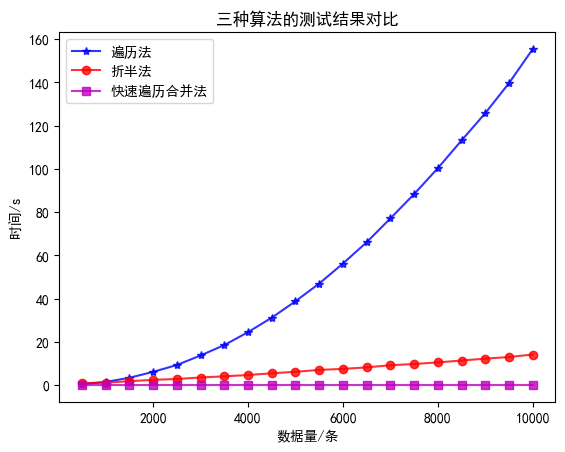

In [12]:
#三种算法的测试
import time
count=0
group=[]
list_scan=[]                      #定义三个列表，存放各组得测试结果
list_reduce=[]
list_fast_scan_merge=[]
for g in range(20):               #20组
    sum1=0
    sum2=0
    sum3=0
    baskets=[]
    count=count+500
    group.append(count)
    data2=data1[0:count]
    item=data2['单号'].value_counts()
    for l in range(10):                          #每组10次平行测试
        
        #t1=time.time()
        #for i in range(len(item.index)):            #遍历算法
         #   temp=[]
          #  for j in range(len(data2)):
           #     if(item.index[i]==data2['单号'][j]):
            #        temp.append(data2['品名'][j])
             #       tem1=','.join(temp)
              #      baskets.append(tem1)
        #t2=time.time() 
        #T=t2-t1
        #sum1=sum1+T
        
        data3=data2
        t1=time.time()                           #折半算法
        for i in range(len(item.index)):
            temp=[]
            for j in range(item.values[i]):
                low=0
                high=len(data3['单号'])-1
                y=0
                while(low<=high):
                    mid=(low+high)//2
                    if(item.index[i]==data3['单号'][mid]):
                        temp.append(data3['品名'][mid])
                        y=mid
                        break
                    elif(item.index[i]>data3['单号'][mid]):
                        low=mid+1
                    elif(item.index[i]<data3['单号'][mid]):
                        high=mid-1
                    if(low>high):
                        break
                data3=data3.drop(labels=y)
                data3.reset_index(inplace=True)
                data3=data3.drop('index',axis=1)
            tem2=','.join(temp)
            baskets.append(tem2) 
        t2=time.time() 
        T=t2-t1
        sum2=sum2+T
        
        j=0                                      #快速遍历合并算法
        n=0
        t1=time.time()
    def fast_scan_merge(data_id,data):
        j=0
        baskets=[]
        for i in range(len(item.index)):
            temp=[]
            while j<len(data2['单号']):
                if(item.index[i]==data2['单号'][j]):
                    a=j
                    b=j+item.values[i]
                    for x in range(a,b):
                        if(x<len(data2['单号']) and item.index[i]==data2['单号'][x]):
                            temp.append(data2['品名'][x])
                        else:
                            n=len(temp)
                            tem3=','.join(temp)
                            baskets.append(tem3)
                            break 
                break
            j=j+n 
        return baskets
        t2=time.time() 
        T=t2-t1
        sum3=sum3+T
    #mean1=sum1/10                         #以秒为单位
    #list_scan.append(mean1)
    mean2=sum2/10
    list_reduce.append(mean2)
    mean3=sum3/10
    list_fast_scan_merge.append(mean3)
    print(g)
    list_scan=[0.36,1.41, 3.32, 6.07, 9.23, 13.65, 18.45, 24.45, 31.14,38.74, 46.94, 56.2, 66.06, 77.1, 88.36, 100.34, 113.19, 125.83, 139.73, 155.49]

import matplotlib.pyplot as plt                 #画图
plt.rcParams['font.sans-serif']= 'SimHei'

plt.plot(group, list_scan, 'b*-', alpha=0.8, linewidth=1.5, label="遍历法")
plt.plot(group, list_reduce, 'ro-', alpha=0.8, linewidth=1.5, label="折半法")
plt.plot(group, list_fast_scan_merge, 'ms-', alpha=0.8, linewidth=1.5, label="快速遍历合并法")

plt.legend()  
plt.xlabel('数据量/条') 
plt.ylabel('时间/s')
plt.title("三种算法的测试结果对比") 
plt.show()

   

In [13]:
list_scan=[0.36,1.41, 3.32, 6.07, 9.23, 13.65, 18.45, 24.45, 31.14,38.74, 46.94, 56.2, 66.06, 77.1, 88.36, 100.34, 113.19, 125.83, 139.73, 155.49]

for i in range(20):
    list_scan[i]=round(list_scan[i],2)
    list_reduce[i]=round(list_reduce[i],2)
    list_fast_scan_merge[i]=round(list_fast_scan_merge[i],2)
print(list_scan)
print(list_reduce)
print(list_fast_scan_merge)

[0.36, 1.41, 3.32, 6.07, 9.23, 13.65, 18.45, 24.45, 31.14, 38.74, 46.94, 56.2, 66.06, 77.1, 88.36, 100.34, 113.19, 125.83, 139.73, 155.49]
[0.86, 1.08, 1.74, 2.37, 2.78, 3.46, 3.99, 4.61, 5.4, 6.1, 6.97, 7.44, 8.15, 9.12, 9.71, 10.44, 11.31, 12.19, 12.93, 14.1]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


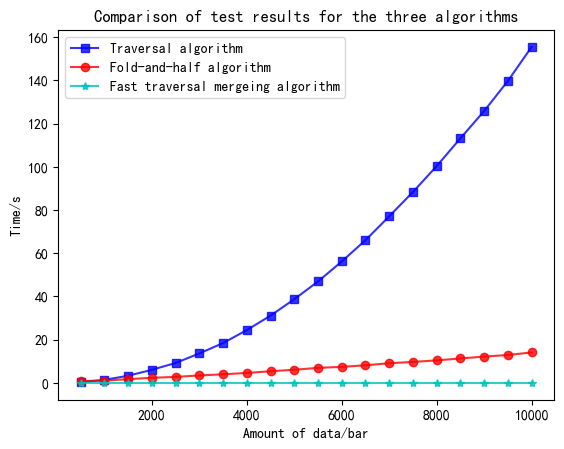

In [219]:
import matplotlib.pyplot as plt                 #画图
plt.rcParams['font.sans-serif']= "SimHei"


list_scan=[0.36, 1.41, 3.32, 6.07, 9.23, 13.65, 18.45, 24.45, 31.14, 38.74, 46.94, 56.2, 66.06, 77.1, 88.36, 100.34, 113.19, 125.83, 139.73, 155.49]
list_reduce=[0.86, 1.08, 1.74, 2.37, 2.78, 3.46, 3.99, 4.61, 5.4, 6.1, 6.97, 7.44, 8.15, 9.12, 9.71, 10.44, 11.31, 12.19, 12.93, 14.1]
list_fast_scan_merge=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

group=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000]
plt.plot(group, list_scan, 'bs-', alpha=0.8, linewidth=1.5, label="Traversal algorithm")
plt.plot(group, list_reduce, 'ro-', alpha=0.8, linewidth=1.5, label="Fold-and-half algorithm")
plt.plot(group, list_fast_scan_merge, 'c*-', alpha=0.8, linewidth=1.5, label="Fast traversal mergeing algorithm")

plt.legend()  
plt.xlabel('Amount of data/bar') 
plt.ylabel('Time/s')
plt.title("Comparison of test results for the three algorithms") 
plt.show()

In [15]:
from scipy.stats import friedmanchisquare

# 三组算法的运行时间数据
algo1 = list_scan
algo2 = list_reduce
algo3 = list_fast_scan_merge

# 将数据按列组成一个二维数组
data = [algo1, algo2, algo3]

# 使用Friedman检验
stat, p = friedmanchisquare(*data)

# 输出检验结果
print('Friedman test statistic:', stat)
print('p-value:', p)

Friedman test statistic: 38.10000000000002
p-value: 5.329544830873161e-09


In [31]:
from scipy.stats import ks_2samp
ks_value=ks_2samp(list_reduce,list_fast_scan_merge)
print(ks_value)

KstestResult(statistic=1.0, pvalue=1.4508889103849681e-11)


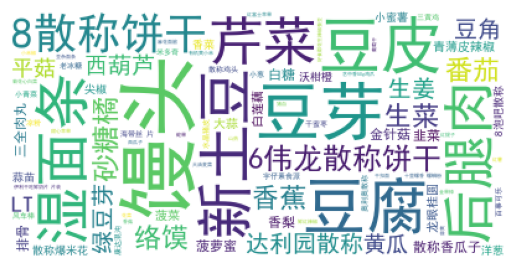

In [225]:
import warnings
import math

# 忽略所有类型的警告
warnings.filterwarnings('ignore')
data2 = data_aprior["baskets"].astype(str)
words = _flatten(list(data2)) #先转化成列表再用flatten变成元组
text=' '.join(words)
wc=WordCloud(background_color='white',font_path="C:\Windows\Fonts\simhei.ttf")
wc.generate(text)
plt.imshow(wc)
plt.axis('off') #关闭坐标轴
plt.show(wc)

In [26]:
data_id=data_aprior.drop('baskets',axis=1)
data_id

,id
0,420022301010001
1,420022301010002
2,420022301010003
3,420022301010004
4,420022301010005
...,...
17905,420022302280225
17906,420022302280226
17907,420022302280227
17908,420022302280228


In [27]:
data_Basket=data_aprior['baskets'].str.get_dummies(',')
data_Basket

,月仙,鸡柳,#好丽友薯愿香焗番茄味,#洽洽啵乐冻葡萄味,+-*/原味海苔15,+-*/气球棒棒糖,+-*/牛肉粒麻辣味,+-*/辣味海苔15,+-38g清新含片（柠檬味）,-0515保鲜膜,...,齐峰澡巾,齐峰男士沐浴澡巾,齐峰经济沐浴澡巾,齿轮灯光火车压片糖,龙井绿茶,龙口粉丝,龙烟呈祥细,龙眼桂圆,（777）长白山,＋－×÷榴莲味糖
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data=data_id.join(data_Basket)
data

,id,月仙,鸡柳,#好丽友薯愿香焗番茄味,#洽洽啵乐冻葡萄味,+-*/原味海苔15,+-*/气球棒棒糖,+-*/牛肉粒麻辣味,+-*/辣味海苔15,+-38g清新含片（柠檬味）,...,齐峰澡巾,齐峰男士沐浴澡巾,齐峰经济沐浴澡巾,齿轮灯光火车压片糖,龙井绿茶,龙口粉丝,龙烟呈祥细,龙眼桂圆,（777）长白山,＋－×÷榴莲味糖
0,420022301010001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,420022301010002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,420022301010003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420022301010004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,420022301010005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17905,420022302280225,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17906,420022302280226,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17907,420022302280227,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17908,420022302280228,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
frequent_itemsets=apriori(data_Basket,use_colnames=True,min_support=0.002)
frequent_itemsets

C:\Users\86158\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


MemoryError: Unable to allocate 6.61 GiB for an array with shape (24753, 2, 17910) and data type int64

In [185]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import jieba
from tkinter import _flatten
association_rules=association_rules(frequent_itemsets,metric='lift')
association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6伟龙散称饼干),(8散称饼干),0.029126,0.031696,0.005997,0.205882,6.495495,0.005073,1.219346
1,(8散称饼干),(6伟龙散称饼干),0.031696,0.029126,0.005997,0.189189,6.495495,0.005073,1.197411
2,(6伟龙散称饼干),(达利园散称),0.029126,0.021702,0.001999,0.068627,3.162281,0.001367,1.050383
3,(达利园散称),(6伟龙散称饼干),0.021702,0.029126,0.001999,0.092105,3.162281,0.001367,1.069368
4,(8散称饼干),(达利园散称),0.031696,0.021702,0.001999,0.063063,2.905880,0.001311,1.044145
...,...,...,...,...,...,...,...,...,...
341,"(馒头, 豆芽)",(豆腐),0.006568,0.046545,0.001999,0.304348,6.538810,0.001693,1.370592
342,"(豆腐, 豆芽)",(馒头),0.008567,0.077384,0.001999,0.233333,3.015252,0.001336,1.203412
343,(馒头),"(豆腐, 豆芽)",0.077384,0.008567,0.001999,0.025830,3.015252,0.001336,1.017721
344,(豆腐),"(馒头, 豆芽)",0.046545,0.006568,0.001999,0.042945,6.538810,0.001693,1.038009


In [186]:
data_end=association_rules.sort_values(['lift','confidence'],ascending=False,)
datass=data_end.head(20)
datass
#datass.to_csv('datass.csv',index=None,encoding='GB18030')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
305,"(金针菇, 生菜)",(三全肉丸),0.003712,0.013706,0.001999,0.538462,39.285256,0.001948,2.136969
308,(三全肉丸),"(金针菇, 生菜)",0.013706,0.003712,0.001999,0.145833,39.285256,0.001948,1.166386
68,(葡萄干),(干蜜枣),0.006853,0.008567,0.002284,0.333333,38.911111,0.002226,1.487150
69,(干蜜枣),(葡萄干),0.008567,0.006853,0.002284,0.266667,38.911111,0.002226,1.354291
317,"(豆皮, 生菜)",(金针菇),0.004569,0.013992,0.002284,0.500000,35.734694,0.002220,1.972016
320,(金针菇),"(豆皮, 生菜)",0.013992,0.004569,0.002284,0.163265,35.734694,0.002220,1.189662
302,(鲜红辣椒),(香菜),0.006282,0.011136,0.002284,0.363636,32.652681,0.002214,1.553928
303,(香菜),(鲜红辣椒),0.011136,0.006282,0.002284,0.205128,32.652681,0.002214,1.250161
307,(金针菇),"(三全肉丸, 生菜)",0.013992,0.004854,0.001999,0.142857,29.428571,0.001931,1.161003
306,"(三全肉丸, 生菜)",(金针菇),0.004854,0.013992,0.001999,0.411765,29.428571,0.001931,1.676214


In [38]:
antecedents=['(Flammulina velutipes)','(Sanquan Meatballs)','(Pork Blood)','(Tofu)','(Garlic)','(Ginger)','(Sanquan Meatballs)','(Lettuce)']
consequents=['(Sanquan Meatballs)','(Flammulina velutipes)','(Tofu)','(Pork Blood)','(Ginger)','(Garlic)','(Lettuce)','(Sanquan Meatballs)']
antecedent_support=[0.016192,0.014294,0.005137,0.041374,0.010609,0.022781,0.014294,0.022446]
consequent_support=[0.014294,0.016192,0.041374,0.005137,0.022781,0.010609,0.022446,0.014294]
support=[0.004076,0.004076,0.003071,0.003071,0.003015,0.003015,0.003797,0.003797]
confidence=[0.251724,0.285156,0.597826,0.074224,0.284211,0.132353,0.265625,0.169154]
lift=[17.610857,17.610857,14.449481,14.449481,12.476006,12.476006,11.834188,11.834188]
leverage=[0.003844,0.003844,0.002858,0.002858,0.002773,0.002773,0.003476,0.003476]
conviction=[1.317303,1.376256,2.383612,1.074626,1.365233,1.140316,1.331138,1.186389]
df=pd.DataFrame.from_dict({
            'antecedents': antecedents,
            'consequents': consequents,
            'antecedent support': antecedent_support,
            'consequent support': consequent_support,
            'support': support,
            'confidence': confidence,
            'lift': lift,
            'leverage': leverage,
            'conviction': conviction},orient='index').T
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Flammulina velutipes),(Sanquan Meatballs),0.016192,0.014294,0.004076,0.251724,17.610857,0.003844,1.317303
1,(Sanquan Meatballs),(Flammulina velutipes),0.014294,0.016192,0.004076,0.285156,17.610857,0.003844,1.376256
2,(Pork Blood),(Tofu),0.005137,0.041374,0.003071,0.597826,14.449481,0.002858,2.383612
3,(Tofu),(Pork Blood),0.041374,0.005137,0.003071,0.074224,14.449481,0.002858,1.074626
4,(Garlic),(Ginger),0.010609,0.022781,0.003015,0.284211,12.476006,0.002773,1.365233
5,(Ginger),(Garlic),0.022781,0.010609,0.003015,0.132353,12.476006,0.002773,1.140316
6,(Sanquan Meatballs),(Lettuce),0.014294,0.022446,0.003797,0.265625,11.834188,0.003476,1.331138
7,(Lettuce),(Sanquan Meatballs),0.022446,0.014294,0.003797,0.169154,11.834188,0.003476,1.186389


In [40]:
df=pd.read_csv("C:/Users/86158/Desktop/项目/工作簿1.csv",encoding='gb18030')
df

,id,baskets
0,4.200000e+14,"""Myco Rondo"" High Calcium Cheese Sticks - 90g ..."
1,4.200000e+14,"Shuanghui 240G King of Kings,Master Kong Super..."
2,4.200000e+14,"190G Black Tea Boost Toothpaste,One Brush Prem..."
3,4.200000e+14,"Mio Children's Toothbrush 920,One Brush Upperc..."


In [41]:
a=[420022301010001,420022301010002,420022301010003,420022301010004]
b=['"Myco Rondo" High Calcium Cheese Sticks - 90g - Fruit Flavour','Shuanghui 240G King of Kings,Master Kong Super Cooler Bucket',
   '190G Black Tea Boost Toothpaste,One Brush Premium Kids 9518,Kiss & Clean 212 Toothbrush,All purpose soap powder',"Mio Children's Toothbrush 920,One Brush Uppercut Kids 9518,Kouyiqing Apple Propolis Children's Toothpaste 70g"]
df=pd.DataFrame.from_dict({
            'id': a,
            'baskets': b},orient='index').T
df

,id,baskets
0,420022301010001,"""Myco Rondo"" High Calcium Cheese Sticks - 90g ..."
1,420022301010002,"Shuanghui 240G King of Kings,Master Kong Super..."
2,420022301010003,"190G Black Tea Boost Toothpaste,One Brush Prem..."
3,420022301010004,"Mio Children's Toothbrush 920,One Brush Upperc..."
